# Programming Assignment 1
Ashna Khemani   \
\
Due Wed 2/5/25

## Problem 1: Finding Prime Numbers

### Method 1

In [4]:
import time

t0 = time.time()

primes = [2]
for i in range(3, 100001):
    isPrime = True
    for f in range(2, i):
        if (i%f == 0):
            isPrime = False
    if isPrime:
        primes.append(i)

tf = time.time()
print("Runtime: {:.1f} s".format(tf-t0))

Runtime: 198.8 s


### Method 2
* Skip evens greater than 2
* Only check divisibility of primes less than ```i```
* Only check factors up to $\sqrt{i}$
* Break once you find the first factor

In [25]:
import math
import time

t0 = time.time()

primes2 = [2]
for i in range(3, 100001):
    isPrime = True
    # Skip this i if even
    if (i%2 == 0):
        continue

    
    # Check i's divisibility by primes less than it (contents of primes2), up to sqrt(i)
    for p in primes2:
        if (p > math.sqrt(i)):
            break
        if (i%p == 0):
            isPrime = False
            break
    
    # Add to list
    if isPrime:
        primes2.append(i)

tf = time.time()
print("Runtime: {:.1f} s".format(tf-t0))

Runtime: 0.1 s


Method 1 takes ~10^4 times longer to run.

## Problem 2: Nuclear Binding Energy

### Part A

In [16]:
A = int(input("Enter A: "))
Z = int(input("Enter Z: "))
print(f"A={A}, Z={Z}")

a1, a2, a3, a4 = 15.8, 18.3, 0.714, 23.2
if A%2!=0:
    a5 = 0
elif A%2==0 and Z%2==0:
    a5 = 12
else:
    a5 = -12

B = a1*A - a2*A**(2/3) - a3*Z**2 / A**(1/3) - a4*(A-2*Z)**2 / A + a5 / A**(1/2)

print(f"B={B}")

A=58, Z=28
B=497.5620206224374


### Part B

In [7]:
print(f"Binding energy per nucleon: " + str(B/A))

Binding energy per nucleon: 8.578655527973059


### Part C

In [22]:
Z = int(input("Enter Z: "))
print(f"Z={Z}")

a1, a2, a3, a4 = 15.8, 18.3, 0.714, 23.2

Bper_max = 0
Aper_max = 0
for A in range(Z, 3*Z+1):
    # Need to recalc a5
    if A%2!=0:
        a5 = 0
    elif A%2==0 and Z%2==0:
        a5 = 12
    else:
        a5 = -12
    # Calculate binding energy B
    B = a1*A - a2*A**(2/3) - a3*Z**2 / A**(1/3) - a4*(A-2*Z)**2 / A + a5 / A**(1/2)
    # ... per nucleon
    Bper = B/A

    # Store Bper and A if these yielded the highest B
    if Bper>Bper_max:
        Bper_max = Bper
        Aper_max = A

print(f"Max binding energy per nucleon (Bper): {Bper_max}    Mass (A): {Aper_max}")

Z=26
Max binding energy per nucleon (Bper): 8.701432576808985    Mass (A): 58


### Part D

In [28]:
a1, a2, a3, a4 = 15.8, 18.3, 0.714, 23.2
most_stable_B, most_stable_Z = 0, 0
for Z in range(1, 101):
    Bper_max = 0
    Aper_max = 0
    for A in range(Z, 3*Z+1):
        # Need to recalc a5
        if A%2!=0:
            a5 = 0
        elif A%2==0 and Z%2==0:
            a5 = 12
        else:
            a5 = -12
        # Calculate binding energy B
        B = a1*A - a2*A**(2/3) - a3*Z**2 / A**(1/3) - a4*(A-2*Z)**2 / A + a5 / A**(1/2)
        # ... per nucleon
        Bper = B/A

        # Store Bper and A if these yielded the highest B
        if Bper>Bper_max:
            Bper_max = Bper
            Aper_max = A
    if Bper_max>most_stable_B:
        most_stable_B = Bper_max
        most_stable_Z = Z
print(f"Most stable Z: {most_stable_Z}    Binding energy per nucleon: {most_stable_B}")

Most stable Z: 28    Binding energy per nucleon: 8.70245768367189


### Part E

In [40]:
# For every element Z,
    # find the most stable nucleus (largest Bper)
    # store the Bper and A
# Graph Bper vs A

import matplotlib.pyplot as plt
# from importlib import reload
# plt=reload(plt)

Bper_max_list = []
Aper_max_list = []

a1, a2, a3, a4 = 15.8, 18.3, 0.714, 23.2
for Z in range (1, 100):
    Bper_max = 0
    Aper_max = 0
    for A in range(Z, 3*Z+1):
        # Need to recalc a5
        if A%2!=0:
            a5 = 0
        elif A%2==0 and Z%2==0:
            a5 = 12
        else:
            a5 = -12
        # Calculate binding energy B
        B = a1*A - a2*A**(2/3) - a3*Z**2 / A**(1/3) - a4*(A-2*Z)**2 / A + a5 / A**(1/2)
        # ... per nucleon
        Bper = B/A

        # Update Bper_max and Aper_max if this A yielded the highest Bper
        if Bper>Bper_max:
            Bper_max = Bper
            Aper_max = A
    # Store this Z's Bper_max and Aper_max in the lists
    Bper_max_list.append(Bper_max)
    Aper_max_list.append(Aper_max)


Text(0, 0.5, 'Bper (binding energy per nucleon)')

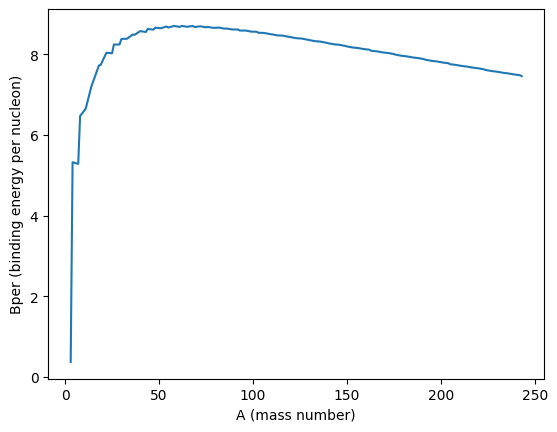

In [41]:
plt.plot(Aper_max_list, Bper_max_list)
plt.xlabel("A (mass number)")
plt.ylabel("Bper (binding energy per nucleon)")

Elements that **release** energy during **fusion**: Light elements -- has a mass number (A) less than about 50     \
Elements that **release** energy during **fission**: Heavy elements -- has a mass number (A) greater than about 50    \
More energy released in *fusion of light nuclei* or *fission of heavy nuclei*: fusion of light nuclei, because the graph is much steeper in the left region (light elements) 

## Problem 3: Running Avg of Dataset

### Part A

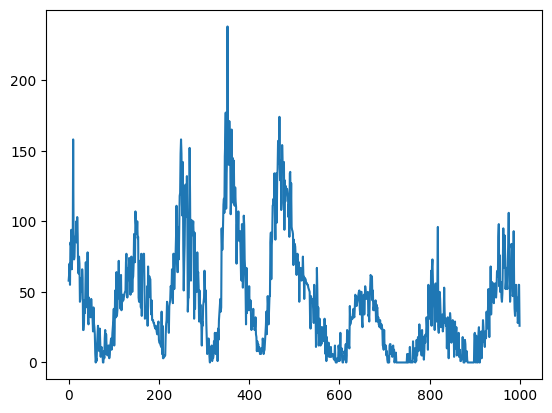

In [10]:
import numpy as np
import matplotlib.pyplot as plt
sunspots_data = np.loadtxt(fname="sunspots.txt", delimiter=" ")
t, n = sunspots_data[:1000, 0], sunspots_data[:1000, 1]

plt.plot(t,n)

### Part B

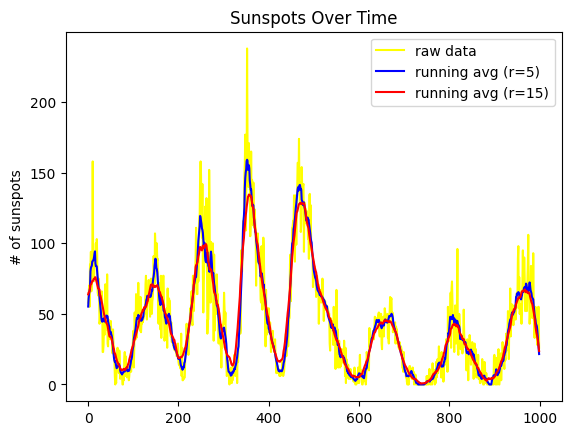

In [37]:
# create function to find running avg data for different r values
def running_avg(r):
    nravgs = []
    for k in range(len(n)):
        summation = 0
        for m in range(-r, r+1):
            # if we run out of data towards the end for the summation, just use what's available
            try:
                summation += n[k+m]
            except:
                continue
        Yk = 1/(2*r+1) * summation
        nravgs.append(Yk)
    return nravgs


# use function to find running avg data for different r values
nravgs_r5 = running_avg(r=5)
nravgs_r15 = running_avg(r=15)

# plot
fig, ax = plt.subplots()

ax.plot(t,n, color="yellow", label="raw data")
ax.plot(t,nravgs_r5, color="blue", label="running avg (r=5)")
ax.plot(t,nravgs_r15, color="red", label="running avg (r=15)")
ax.legend()
ax.set_ylabel("# of sunspots")
ax.set_title("Sunspots Over Time")

plt.show()

Increasing $r$ smooths out the curve more.

## Problem 4 (optional): Mandelbrot Set

### Black/White Binary

* Create grid/set of c's
* Create array mandelbrot_map
* For each c:
    * Start with z=0, and do the following 100 (max_iter) times
        * $z += z^2 + c$
        * If $|z|>2$ at any point, set mandelbrot(x,y) to 0
    * Else keep mandelbrot_map(x,y) to 1
* Plot mandelbrot_map

Text(0, 0.5, 'Im(c)')

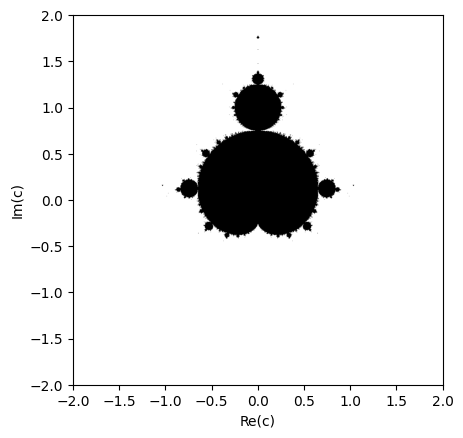

In [13]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000         # resolution
max_iter = 100  # iters to check

Re, Im = np.linspace(-2,2,N), np.linspace(-2,2,N)
m_map = np.ones((N,N))
# c = Re + Im*i
for x in range(N):
    for y in range(N):
        c = Re[x] + Im[y]*1j
        z = 0
        for iters in range(max_iter):
            z = z**2 + c
            if abs(z) > 2:
                m_map[x, y] = 0
                break
plt.imshow(m_map, cmap="binary", extent=[-2,2,-2,2])
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")

### Gradient based on Iterations

* Create grid/set of c's
* Create array mandelbrot_map
* For each c:
    * Start with z=0, and do the following 100 (max_iter) times
        * $z += z^2 + c$
        * If $|z|>2$, log number of iters in m_map
    * If z never >2, log max_iters in m_map
* Plot mandelbrot_map

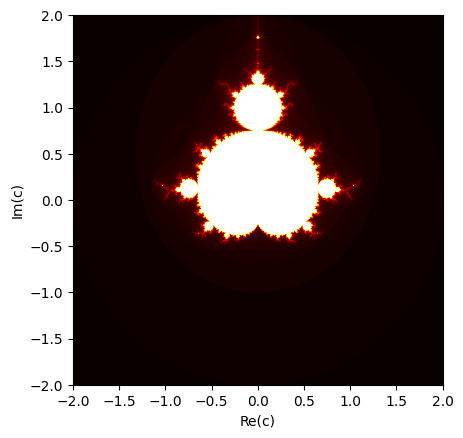

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000         # resolution
max_iter = 100  # iters to check

L = 2   # "side length" of view window, centered at 0,0

def find_iters(c):
    z = 0
    for iters in range(max_iter):
        z = z**2 + c
        if abs(z) > 2:
            return iters
    return max_iter

Re, Im = np.linspace(-L,L,N), np.linspace(-L,L,N)
m_map = np.zeros((N,N))
# c = Re + Im*i
for x in range(N):
    for y in range(N):
        c = Re[x] + Im[y]*1j
        c_iters = find_iters(c)
        m_map[x, y] = c_iters

plt.imshow(m_map, cmap="hot", extent=[-L,L,-L,L])
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")
plt.show()

### Gradient based on $log(iters)$

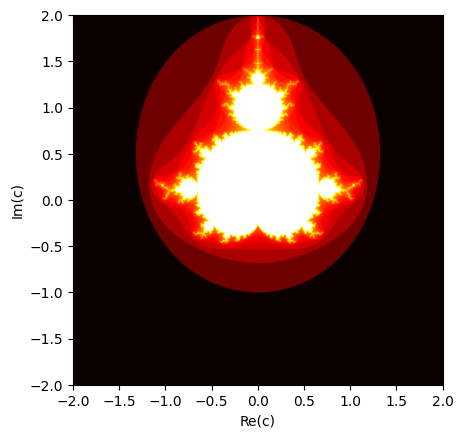

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import math

N = 1000         # resolution
max_iter = 100  # iters to check

L = 2   # "side length" of view window, centered at 0,0

def find_iters(c):
    z = 0
    for iters in range(max_iter):
        z = z**2 + c
        if abs(z) > 2:
            return iters
    return max_iter

Re, Im = np.linspace(-L,L,N), np.linspace(-L,L,N)
m_map = np.zeros((N,N))
# c = Re + Im*i
for x in range(N):
    for y in range(N):
        c = Re[x] + Im[y]*1j
        c_iters = find_iters(c)
        m_map[x, y] = math.log(c_iters) if c_iters>0 else 0

plt.imshow(m_map, cmap="hot", extent=[-L,L,-L,L])
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")
plt.show()